# Part II - Prosper Loan Data
## by Chinelo Cynthia Ezenwafor

## Investigation Overview


> For this presentation, some of the main insights gotten after the analysis would be displayed. The main purpose is to determine if people borrow money within their income range, and observe how loan amount taken and prosper ratings influence a borrower's annual percentage rate


## Dataset Overview

> The prosper loan dataset contains information about 120,000 loaners that patronise prosper loans. It contains information stored in 81 variables about these customers. Data dictionary to undertsand the variables more can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as pe

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Clean_Prosper_loan.csv')

### Main reasons people take a loan

> People have various reasons for needing to take loans and our Prosper loan clients aren't any different. Analysis of listing category of the propser loan clients gives us insight on why they decide to take loans.

In [3]:
median = df.groupby('ListingCategory')['LoanOriginalAmount'].median()
prop = df.ListingCategory.value_counts(normalize = True).sort_values()

#merge the information to a single dataframe
median_df = median.to_frame()
median_df['proportions'] = prop
median_df = median_df.sort_values(by='proportions')

#filter out unclear lsiting categories
reasons = median_df[(median_df.index !='Other') & (median_df.index !='Not Available')]
labels = (reasons['proportions']*100).round(1)


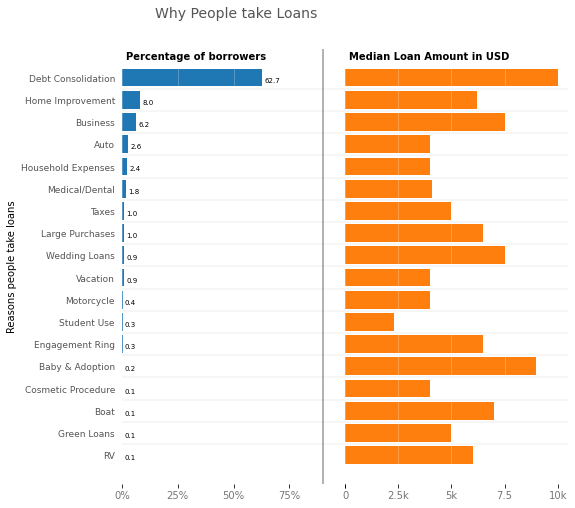

In [4]:
fig = plt.figure(figsize = (8,8))

# create first plot
plt.subplot(1,2,1)
plt.barh(reasons.index, reasons['proportions'], color= sns.color_palette()[0])
plt.xticks(np.arange(0, 1.2, 0.25), ['0%', '25%', '50%', '75%', ''])
plt.yticks(fontsize=9, color = '#555')
plt.ylabel('Reasons people take loans', fontsize = 10)

#Annotate plot name and bar percentages
plt.text(x=0.02, y=17.8, s='Percentage of borrowers',fontsize = 10, fontweight='bold')
for yval, xval, label in zip(range(labels.size), reasons['proportions'], labels):
    plt.text(x=xval+0.01, y=yval-0.2, s=str(label), fontsize =7)

#configure title
plt.text(x=0.15, y=19.7, s='Why People take Loans', fontsize = 14, color = '#555')

# demarcate plots
plt.axvline(x=0.9, color ='grey', alpha = 0.6, linewidth = 2)

#create second plot
plt.subplot(1,2,2)
plt.barh(reasons.index, reasons['LoanOriginalAmount'], color= sns.color_palette()[1])
plt.xticks(np.arange(0, 11000, 2500), ['0', '2.5k', '5k', '7.5', '10k'])
plt.yticks(alpha = 0)

plt.text(x=200, y = 17.8, s='Median Loan Amount in USD', fontsize = 10, fontweight='bold')

#configure style attributes
for axes in fig.get_axes():
    plt.sca(axes)
    sns.despine(left=True, bottom = True)
    plt.tick_params(left=False)
    plt.xticks(fontsize=10, color='#777')
    plt.grid(axis='x', alpha=0.3, color='white')
    
    for i in np.arange(0.5, 17, 1):
        plt.axhline(y=i, linewidth=0.2, alpha=0.5, color='#555')
        
#remove space between subplots
plt.subplots_adjust(wspace=0,hspace=0);
 

### Main reasons people take a loan

> From the plot, 62.7% of the borrowers take loans to pay off existing loans up to the tune of over 10k dollars. Also, it can be seen that people take huge loans to finance things like weddings, baby and adoption and engagement ring. 6.2% of the borrowers take up to 7.5k dollars loans to finance their business.

### Do people borrow money within their income range? 

> It is advisable to keep a debt to income ratio of less than or equal to 0.43. A debt to income ratio greater than 0.5 means the borrower is taking more loans than his income can comfortably offset.

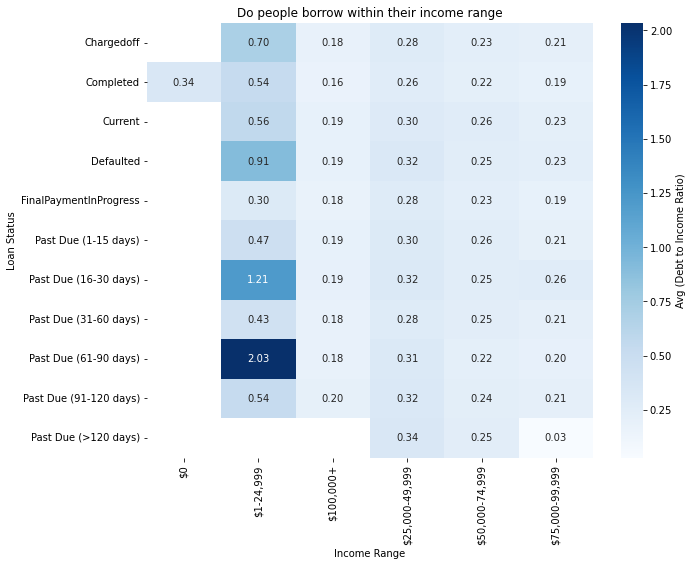

In [5]:
# make a plot
plt.figure(figsize = (10,8))
cat_means = df.groupby(['IncomeRange', 'LoanStatus']).mean()['DebtToIncomeRatio']
cat_means = cat_means.reset_index(name = 'Avg_of_DebtToIncomeRatio')
cat_means = cat_means.pivot(index = 'LoanStatus', columns = 'IncomeRange', values= 'Avg_of_DebtToIncomeRatio')

sns.heatmap(cat_means, annot = True, fmt ='.2f', cmap = 'Blues', cbar_kws = {'label':'Avg (Debt to Income Ratio)'})
plt.xlabel('Income Range')
plt.ylabel('Loan Status')
plt.title('Do people borrow within their income range');

> From the plot, it can be obseved that borrowers who earn between 1-24.999k dollars, tend to have high debt to income ratio(>= 0.5), it can also be seen that majority of these group are owing loans past their due date. Borrowers who earn from 25k and above, tend to keep their loan appropriate to their income.

### Do loan amount taken and prosper ratings influence a borrower's annual percentage rate?

> To analyse the difference in borrowing power between high-rated and low rated borrowers, and the influence the amount of loan taken has on the loan interest.


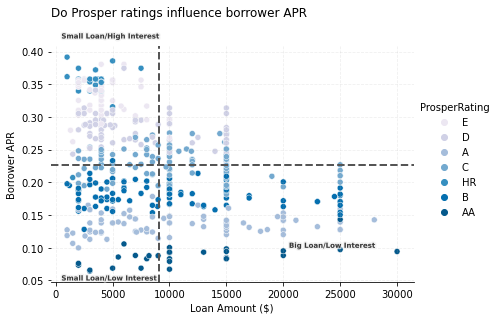

In [6]:
# make a plot
sns.relplot(data = df.sample(500, random_state = 1), y='BorrowerAPR', x='LoanOriginalAmount', 
            hue ='ProsperRating', palette='PuBu', height = 4, aspect = 1.5)
sns.despine(left =True)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.grid(alpha=0.2, linestyle='--')

#divide the plot into quadrants
plt.axhline(y=df['BorrowerAPR'].mean(), linewidth=2, linestyle='--', color='#555')
plt.axvline(x=df['LoanOriginalAmount'].mean(), linewidth=2, linestyle='--', color='#555')

# Qudrant annotations
plt.text(x=20500, y=0.10, s='Big Loan/Low Interest', fontsize=7,fontweight='bold', color='#000', alpha=0.7, 
        path_effects=[pe.withStroke(linewidth=3, foreground='#eee')])
plt.text(x=500, y=0.05, s='Small Loan/Low Interest', fontsize=7,fontweight='bold', color='#000', alpha=0.7, 
        path_effects=[pe.withStroke(linewidth=3, foreground='#eee')])
plt.text(x=500, y=0.42, s='Small Loan/High Interest', fontsize=7,fontweight='bold', color='#000', alpha=0.7, 
        path_effects=[pe.withStroke(linewidth=3, foreground='#eee')])

plt.title('Do Prosper ratings influence borrower APR', pad = 30, loc='left');

> From the plot, we can observe the relationship between the three variables. Borrowers with high prosper ratings are opportuned to take loans (both large and small) at lower interest rates, while borrowers with low prosper ratings mostly take smaller loans but get higher interest rates.

In [7]:
!jupyter nbconvert Part_II_Explanatory_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Explanatory_slide_deck.ipynb to slides
[NbConvertApp] Writing 767365 bytes to Part_II_Explanatory_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\User\New folder\ANACONDA3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\User\New folder\ANACONDA3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\User\New folder\ANACONDA3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\User\New folder\ANACONDA3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\User\New folder\ANACONDA3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in conv